## Importing necessary libraries

In [1]:
# Library for creating data paths
import os

# Library for randomly selecting data points
import random

# Library for performing numerical computations
import numpy as np

import pandas as pd

# Library for creating and showing plots
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

# Importing all the required sub-modules from Keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

# utils hosts img_to_array, load_img
from tensorflow.keras.utils import img_to_array, load_img

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Import ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# Library for creating visual plots
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Library for image modification
import cv2

# import tensorflow
import tensorflow as tf

# Library for train_test_split
from sklearn.model_selection import train_test_split

## Loading the dataset

In [2]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
images = np.load('/content/drive/MyDrive/Colab_Notebooks/Data/images.npy')
labels = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [4]:
# view first row of the data in images
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [5]:
# output of shape
images.shape

(4750, 128, 128, 3)

In [6]:
# quick check of data type
type(images)

numpy.ndarray

In [7]:
labels.shape

(4750, 1)

In [8]:
labels.nunique()

Label    12
dtype: int64

In [9]:
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


### Findings


* The images dataset consists of 4750 rows
* Each row consists of a 128 by 128 by 3 image array
* The labels dataset consists of 4750 rows
* The labels dataset consists of a label for each image
* There are 12 unique labels



## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

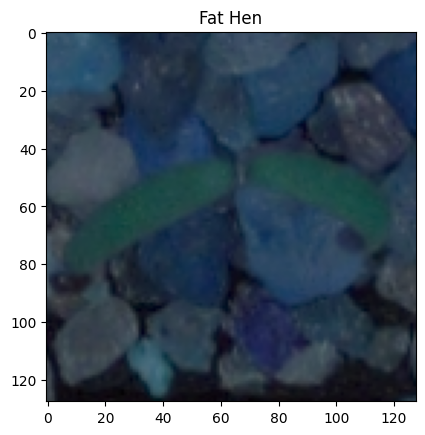

In [10]:
# Look at one image at a time
# note the row and column indices of each image
# 128 by 128
# verify the image and label
random_index = np.random.randint(0, len(labels))
images[random_index, :]
plt.imshow(images[random_index, :], cmap=plt.get_cmap('gray'))
plt.title(labels.loc[random_index, 'Label' ])
plt.show()

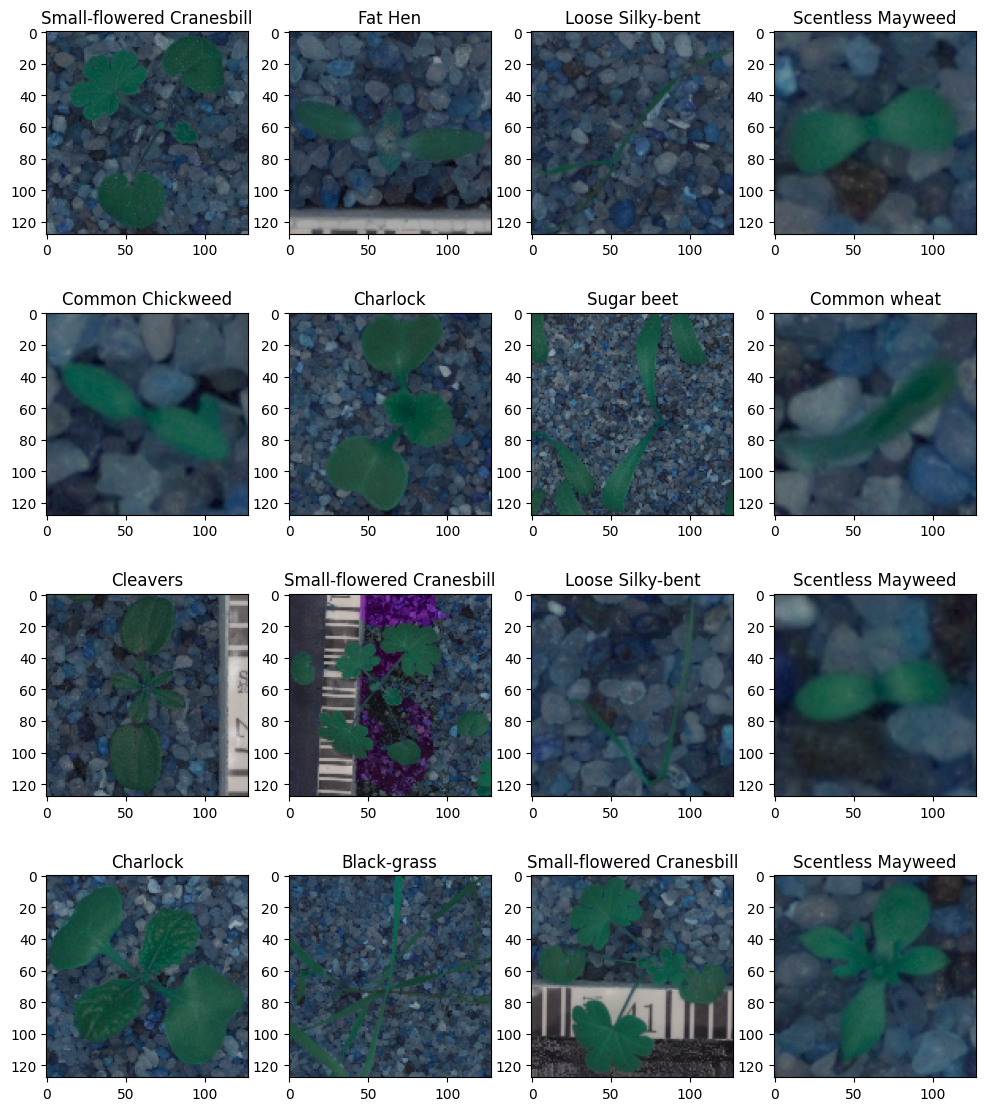

In [11]:
# Look at additional images to get a sense of the data
# generate a random index
# verify the images and the labels
random_index = np.random.randint(0, len(labels))
num_classes=12                                                                # Number of Classes
categories=np.unique(labels)                                                   # Obtaing the unique classes from y_train
rows = 4                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(12, 14))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(labels))                       # Generating random indices from the data and plotting the images
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(images[random_index, :], cmap=plt.get_cmap('gray'))          # Plotting the image using cmap=gray
        ax.set_title(labels.loc[random_index, 'Label'])
plt.show()

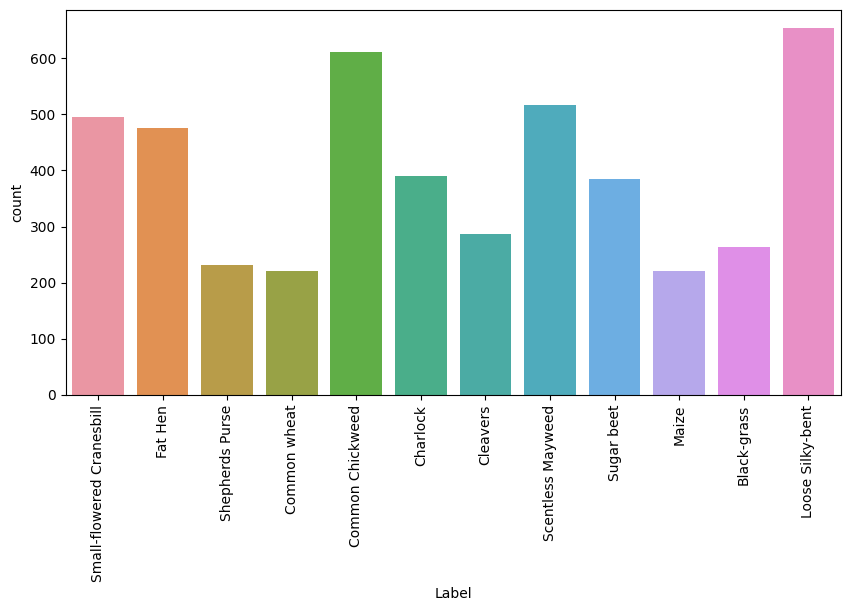

In [12]:
# observe balance of data using countplot
plt.figure(figsize = (10, 5))
count_plot = sns.countplot(x = labels.loc[:, 'Label'])
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation = 90)
plt.show()

# may need to use synthesis

### Findings


* Not all of the images are centered
* Some of the images edges of a pot or a label of some kind
* Images are taken from various distances
* Some of the images are blurry
* The counts of seedlings does not seem to be balanced
* Some synthesis or feature engineering may be necessary
*   List item



## Data Pre-Processing

### Convert the BGR images to RGB images.

In [13]:
# create a variable to store converted images
RGB_images = np.empty(shape = (4750, 128, 128,3))

# use cv2 to convert BGR images to RGB images
for i in range(0, 4750):
  RGB_images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
RGB_images.shape

(4750, 128, 128, 3)

In [15]:
# create a variable to store converted images
RGB_images_resized = np.empty(shape = (4750, 64, 64,3), dtype = int)

# capture original sizes
width = images.shape[1]
height = images.shape[2]

# set new dimensions
new_height = 64
new_width = 64
dimensions = (new_width, new_height)

# use cv2 to resize images
for i in range(0, 4750):
  RGB_images_resized[i] = cv2.resize(RGB_images[i], dimensions)
resized_width = RGB_images_resized.shape[1]
resized_height = RGB_images_resized.shape[2]

# verify the change has been implemented
print("Original dimensions: ", width, height)
print("Resized dimensions: ", resized_width, resized_height)

Original dimensions:  128 128
Resized dimensions:  64 64


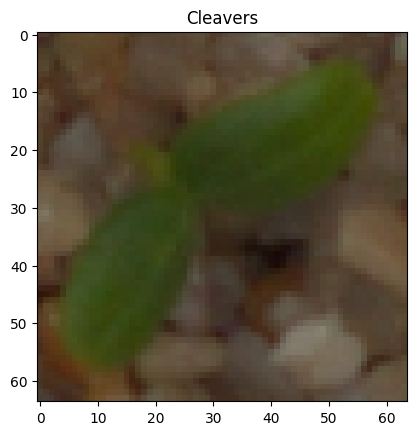

In [16]:
# Look at one image at a time
# note the row and column indices of each image
# 64 by 64
# verify the image and label
random_index = np.random.randint(0, len(labels))
RGB_images_resized[random_index, :]
plt.imshow(RGB_images_resized[random_index, :], cmap=plt.get_cmap('gray'))
plt.title(labels.loc[random_index, 'Label' ])
plt.show()

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [17]:
# leverage train test split to create train, test, validation
X_train, X_test, y_train, y_test = train_test_split(RGB_images_resized, labels,
                                                    test_size = 0.30, random_state = 1,
                                                    stratify = labels)
# split test set into test and validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,
                                                test_size = 0.3, random_state = 1,
                                                stratify = y_test)

In [18]:
X_train.shape

(3325, 64, 64, 3)

In [19]:
X_test.shape

(997, 64, 64, 3)

### Encode the target labels

In [20]:
type(y_train)

pandas.core.frame.DataFrame

In [24]:
np.ravel(y_train)

array(['Common Chickweed', 'Fat Hen', 'Common wheat', ...,
       'Loose Silky-bent', 'Loose Silky-bent', 'Common wheat'],
      dtype=object)

In [117]:
from sklearn.preprocessing import LabelEncoder

# prep data for encoding, to_categorical doesn't accept strings
y_train_array = np.array(np.ravel(y_train))
y_test_array = np.array(np.ravel(y_test))
y_val_array = np.array(np.ravel(y_val))

# encode with int values
label_encoder = LabelEncoder()
y_train_vec = label_encoder.fit_transform(y_train_array)
y_test_vec = label_encoder.fit_transform(y_test_array)
y_val_vec = label_encoder.fit_transform(y_val_array)

# Use get_dummies to encode target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train_vec)
y_test_encoded = tf.keras.utils.to_categorical(y_test_vec)
y_val_encoded = tf.keras.utils.to_categorical(y_val_vec)

### Data Normalization

In [106]:
# Normalize image pixels for train, test, val
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0

In [107]:
X_train_normalized.shape

(3325, 64, 64, 3)

In [108]:
y_train_encoded.shape

(3325, 12)

## Model Building

In [135]:
# set random seed for reproducibility
import random
np.random.seed(1) #for numpy
random.seed(1)
tf.random.set_seed(1) #for tensorflow

In [136]:
# allow clearing of sessions
from tensorflow.keras import backend
backend.clear_session()

In [111]:
# initialize a sequential model
cnn_model = Sequential()

# Add a convolution layer
# input shape takes in 64 by 64 images that were resized earlier
cnn_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3), padding = 'same'))

# add max pooling layer to reduce the size of the first conv layer
cnn_model.add(MaxPooling2D(2,2))

# add a bath normalization layer
cnn_model.add(BatchNormalization())

# add additional conv, max pooling, and batch normalization layers
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))

# flatten the output to prep for connections
cnn_model.add(Flatten())

# add dense layers and some droput to reduce overfitting
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32, activation='relu'))

# output layer accounts for 12 categories
# with multiple categories use activation softmax
cnn_model.add(Dense(12, activation='softmax'))

In [112]:
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

In [113]:
model1 = cnn_model.fit(X_train_normalized, y_train_encoded,
                       epochs = 10,
                       validation_split = 0.1,
                       shuffle = True,
                       batch_size = 64,
                       verbose = 2)

Epoch 1/10
47/47 - 19s - loss: 2.4083 - accuracy: 0.1447 - val_loss: 2.4651 - val_accuracy: 0.1471 - 19s/epoch - 408ms/step
Epoch 2/10
47/47 - 18s - loss: 2.0431 - accuracy: 0.3225 - val_loss: 2.5014 - val_accuracy: 0.1471 - 18s/epoch - 374ms/step
Epoch 3/10
47/47 - 16s - loss: 1.6296 - accuracy: 0.4355 - val_loss: 2.9570 - val_accuracy: 0.1471 - 16s/epoch - 348ms/step
Epoch 4/10
47/47 - 17s - loss: 1.4014 - accuracy: 0.5164 - val_loss: 5.1750 - val_accuracy: 0.1471 - 17s/epoch - 362ms/step
Epoch 5/10
47/47 - 16s - loss: 1.2403 - accuracy: 0.5732 - val_loss: 5.3636 - val_accuracy: 0.1471 - 16s/epoch - 349ms/step
Epoch 6/10
47/47 - 16s - loss: 1.1307 - accuracy: 0.6106 - val_loss: 7.8838 - val_accuracy: 0.1471 - 16s/epoch - 349ms/step
Epoch 7/10
47/47 - 18s - loss: 1.0111 - accuracy: 0.6477 - val_loss: 10.0521 - val_accuracy: 0.1471 - 18s/epoch - 373ms/step
Epoch 8/10
47/47 - 18s - loss: 0.9238 - accuracy: 0.6858 - val_loss: 8.2194 - val_accuracy: 0.1471 - 18s/epoch - 376ms/step
Epoch 9

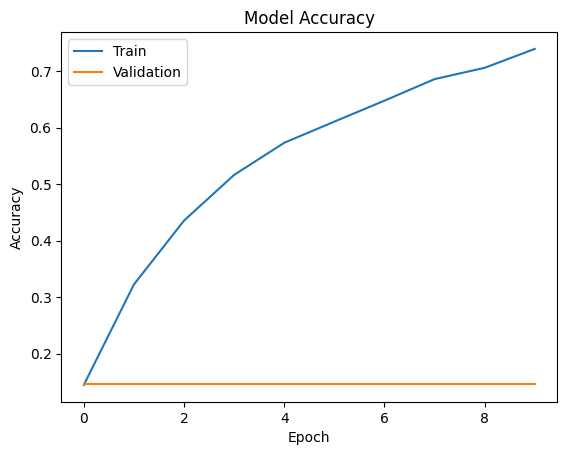

In [114]:
# evaluate the model
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

### Findings


* Accuracy of the training set improves over epochs
* Accuracy of validation set does not
* This indicates overfitting and also indicates the need for data augmentation
* Confusion matrix indicates multiple misclassifications




In [138]:
# set random seed for reproducibility
import random
np.random.seed(1) #for numpy
random.seed(1)
tf.random.set_seed(1) #for tensorflow

In [137]:
# allow clearing of sessions
from tensorflow.keras import backend
backend.clear_session()

In [141]:
# initialize a sequential model
cnn_model2 = Sequential()

# Add a convolution layer
# input shape takes in 64 by 64 images that were resized earlier
cnn_model2.add(Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3), padding = 'same'))

# add max pooling layer to reduce the size of the first conv layer
cnn_model2.add(MaxPooling2D(2,2))

# add a bath normalization layer
cnn_model2.add(BatchNormalization())

# add additional conv, max pooling, and batch normalization layers
cnn_model2.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model2.add(MaxPooling2D(2,2))
cnn_model2.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))

# flatten the output to prep for connections
cnn_model2.add(Flatten())

# add dense layers and some droput to reduce overfitting
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Dense(32, activation='relu'))

# output layer accounts for 12 categories
# with multiple categories use activation softmax
cnn_model2.add(Dense(12, activation='softmax'))

In [143]:
# compile the model
# capture a summary
cnn_model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [144]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model2 = cnn_model2.fit(X_train_normalized, y_train_encoded,
              callbacks=[reduce_lr],
              epochs = 10,
              validation_split = 0.1,
              shuffle = True,
              batch_size = 64,
              verbose = 2)

Epoch 1/10
47/47 - 19s - loss: 2.3946 - accuracy: 0.1430 - val_loss: 2.4569 - val_accuracy: 0.1471 - lr: 0.0010 - 19s/epoch - 400ms/step
Epoch 2/10
47/47 - 17s - loss: 2.0011 - accuracy: 0.2801 - val_loss: 3.2761 - val_accuracy: 0.1471 - lr: 0.0010 - 17s/epoch - 353ms/step
Epoch 3/10
47/47 - 17s - loss: 1.7273 - accuracy: 0.3683 - val_loss: 3.9133 - val_accuracy: 0.1471 - lr: 0.0010 - 17s/epoch - 355ms/step
Epoch 4/10
47/47 - 18s - loss: 1.5543 - accuracy: 0.4385 - val_loss: 7.2196 - val_accuracy: 0.1471 - lr: 0.0010 - 18s/epoch - 377ms/step
Epoch 5/10
47/47 - 17s - loss: 1.4009 - accuracy: 0.4923 - val_loss: 7.8651 - val_accuracy: 0.1471 - lr: 0.0010 - 17s/epoch - 351ms/step
Epoch 6/10
47/47 - 16s - loss: 1.3150 - accuracy: 0.5338 - val_loss: 6.6941 - val_accuracy: 0.1471 - lr: 0.0010 - 16s/epoch - 349ms/step
Epoch 7/10
47/47 - 17s - loss: 1.2035 - accuracy: 0.5872 - val_loss: 10.1015 - val_accuracy: 0.1471 - lr: 0.0010 - 17s/epoch - 372ms/step
Epoch 8/10
47/47 - 18s - loss: 1.0836 - 

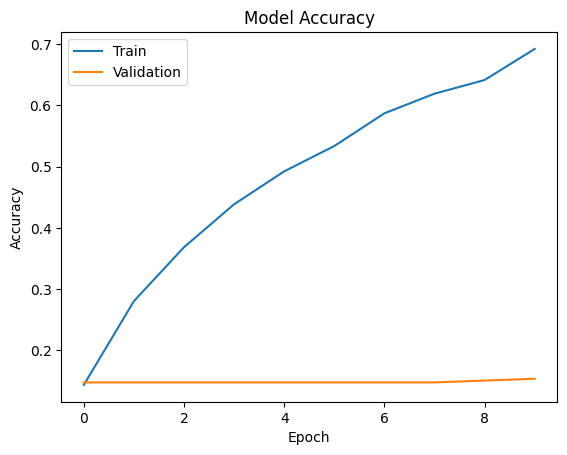

In [145]:
# evaluate the model
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [146]:
# Data augmentation against training set
# initial findings revealed images with varying
# degrees of focus, size, centering, etc.


# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.1)
# normalization of test set
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# normalization of val set
val_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Flowing training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow(X_train, y_train_encoded, batch_size = 20)

# Flowing testing images in batches of 20 using test_datagen generator
test_generator =  test_datagen.flow(X_test, y_test_encoded, batch_size = 20)

# Flowing testing images in batches of 20 using test_datagen generator
val_generator =  val_datagen.flow(X_val, y_val_encoded, batch_size = 20)

In [147]:
# set random seed for reproducibility
import random
np.random.seed(1) #for numpy
random.seed(1)
tf.random.set_seed(1) #for tensorflow

In [148]:
# allow clearing of sessions
from tensorflow.keras import backend
backend.clear_session()

In [149]:
# initialize a sequential model
cnn_model3 = Sequential()

# Add a convolution layer
# input shape takes in 64 by 64 images that were resized earlier
cnn_model3.add(Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3), padding = 'same'))

# add max pooling layer to reduce the size of the first conv layer
cnn_model3.add(MaxPooling2D(2,2))

# add a bath normalization layer
cnn_model3.add(BatchNormalization())

# add additional conv, max pooling, and batch normalization layers
cnn_model3.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model3.add(MaxPooling2D(2,2))
cnn_model3.add(BatchNormalization())
cnn_model3.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model3.add(MaxPooling2D(2,2))
cnn_model3.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))

# flatten the output to prep for connections
cnn_model3.add(Flatten())

# add dense layers and some droput to reduce overfitting
cnn_model3.add(Dense(64, activation='relu'))
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Dense(32, activation='relu'))
cnn_model3.add(Dropout(0.25))
cnn_model3.add(Dense(32, activation='relu'))

# output layer accounts for 12 categories
# with multiple categories use activation softmax
cnn_model3.add(Dense(12, activation='softmax'))

In [150]:
# compile the model
# capture a summary
cnn_model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

In [151]:
# Pulling a single large batch of random testing data for testing after each epoch
testX, testY = test_generator.next()

In [152]:
# run ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

# fit the model
model3 = cnn_model3.fit(train_generator,
                        validation_data = (testX, testY),
                        callbacks=[reduce_lr],
                        epochs = 20,
                        verbose = 2)

Epoch 1/20
167/167 - 20s - loss: 2.2663 - accuracy: 0.2262 - val_loss: 2.9340 - val_accuracy: 0.2000 - lr: 0.0010 - 20s/epoch - 119ms/step
Epoch 2/20
167/167 - 19s - loss: 1.7905 - accuracy: 0.3913 - val_loss: 3.9331 - val_accuracy: 0.2000 - lr: 0.0010 - 19s/epoch - 112ms/step
Epoch 3/20
167/167 - 19s - loss: 1.5877 - accuracy: 0.4559 - val_loss: 1.5833 - val_accuracy: 0.6000 - lr: 0.0010 - 19s/epoch - 117ms/step
Epoch 4/20
167/167 - 18s - loss: 1.4972 - accuracy: 0.4941 - val_loss: 2.0141 - val_accuracy: 0.2000 - lr: 0.0010 - 18s/epoch - 109ms/step
Epoch 5/20
167/167 - 20s - loss: 1.3871 - accuracy: 0.5332 - val_loss: 1.5706 - val_accuracy: 0.4000 - lr: 0.0010 - 20s/epoch - 121ms/step
Epoch 6/20
167/167 - 18s - loss: 1.3344 - accuracy: 0.5567 - val_loss: 1.5607 - val_accuracy: 0.6000 - lr: 0.0010 - 18s/epoch - 109ms/step
Epoch 7/20
167/167 - 20s - loss: 1.2294 - accuracy: 0.5892 - val_loss: 2.2661 - val_accuracy: 0.2000 - lr: 0.0010 - 20s/epoch - 122ms/step
Epoch 8/20
167/167 - 18s - 

In [153]:
# Evaluating on the Test dataset
cnn_model3.evaluate(test_generator)

50/50 [==============================] - 1s 26ms/step - loss: 0.8603 - accuracy: 0.7472


[0.8603308796882629, 0.747241735458374]

In [154]:
# Evaluating on the Validation dataset
cnn_model3.evaluate(val_generator)

22/22 [==============================] - 1s 27ms/step - loss: 0.8022 - accuracy: 0.7850


[0.8021775484085083, 0.7850467562675476]

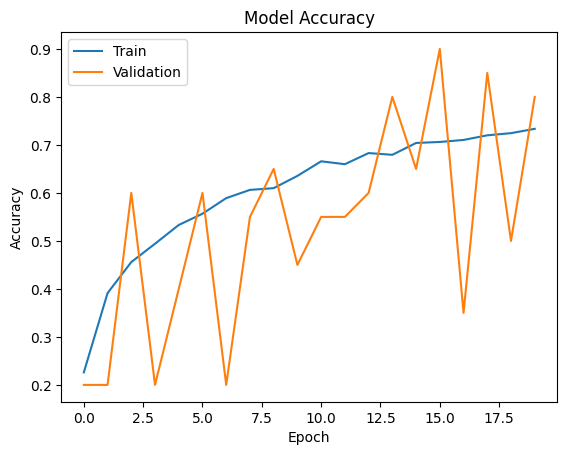

In [155]:
# evaluate the model
plt.plot(model3.history['accuracy'])
plt.plot(model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [157]:
# Pulling a single large batch of random testing data for testing after each epoch
testX, testY = test_generator.next()

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Findings and Final Model


* The labels were observed to be imbalanced
* Initial modesl did not use data augmentation
* Predictions in the first two models predicted images as one type of seedling
* The first model had accuracy of 75% on training and 15% on the test set
* The second model had accuracy of 69% and 15%. The second model used ReduceLROnPlateau
* The final model had accuracy of 73% on training and 80% on test set
* The final model used data augmentation on the training set
* Using Evaluate revealed a max accuracy on test of 86% on test
* Using Evaluate revealed a max accuracy on validation of 80%
* Confusion matrix revealed successful classification



### Visualizing the prediction

1/1 [==============================] - 0s 117ms/step


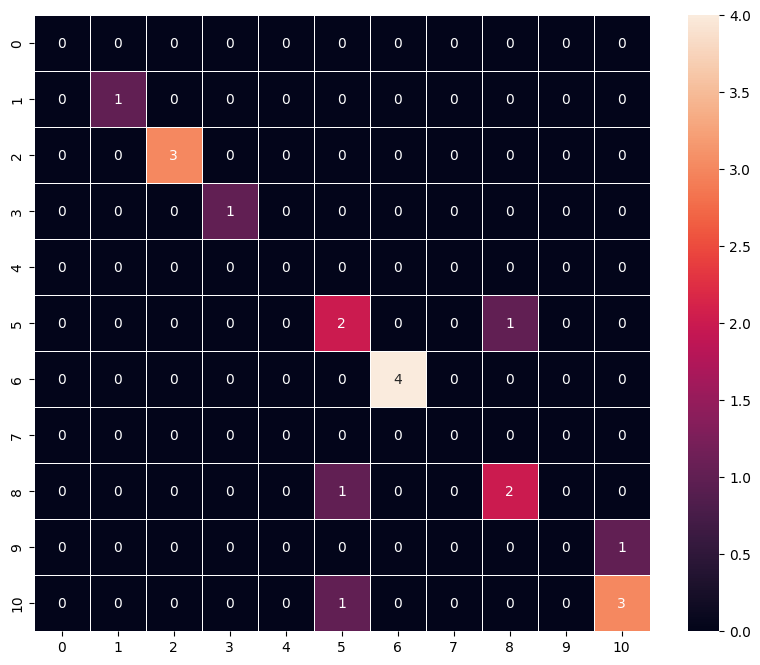

In [156]:
# generate some predictions
y_pred = cnn_model3.predict(testX)
y_pred.shape

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(testY,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Actionable Insights and Business Recommendations



* Improved accuracy can be achieved by using data augmentation
* Some additional investigation and experimentation could be run using different combinations of CNN Layers, Batch Normalization, and Dropout
* Additionally, different data augmentation techniques can be used to achieve better accuracy measurement
* Plant and weed classification can be automated at levels of 80%-86% accuracy using the current model
* Putting the model into production could save significant amounts of money
* Savings due to automated identification could be reinvested into improved results from the model



_____